In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the necessary models needed

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam

# Load Stock Price Prediction Dataset

In [3]:
df = pd.read_csv('JPM.csv')  

In [4]:
# Display the first few rows of the dataset
print(df.head())

       Date        Open        High         Low       Close   Adj Close  \
0  9/1/2022  113.290001  114.629997  111.910004  114.510002  108.298668   
1  9/2/2022  115.870003  117.449997  113.190002  113.709999  107.542061   
2  9/6/2022  114.330002  114.750000  112.070000  113.739998  107.570435   
3  9/7/2022  113.129997  116.110001  112.760002  115.900002  109.613281   
4  9/8/2022  115.279999  118.790001  114.629997  118.599998  112.166817   

     Volume  
0   9979800  
1  10666600  
2   9751900  
3  10647900  
4  11435000  


# Exploratory Data Analysis

In [5]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [6]:
# Convert the 'Date' column to datetime format (if applicable)
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

In [41]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,113.290001,114.629997,111.910004,114.510002,108.298668,9979800
2022-09-02,115.870003,117.449997,113.190002,113.709999,107.542061,10666600
2022-09-06,114.330002,114.750000,112.070000,113.739998,107.570435,9751900
2022-09-07,113.129997,116.110001,112.760002,115.900002,109.613281,10647900
2022-09-08,115.279999,118.790001,114.629997,118.599998,112.166817,11435000


In [43]:
# Assuming your DataFrame is named 'df'
df = df.drop(columns=['Adj Close'])

In [44]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-09-01,113.290001,114.629997,111.910004,114.510002,9979800
2022-09-02,115.870003,117.449997,113.190002,113.709999,10666600
2022-09-06,114.330002,114.750000,112.070000,113.739998,9751900
2022-09-07,113.129997,116.110001,112.760002,115.900002,10647900
2022-09-08,115.279999,118.790001,114.629997,118.599998,11435000


# Correlation analysis

In [45]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999248,0.999181,0.998230,-0.295347
High,0.999248,1.000000,0.999081,0.999134,-0.284499
Low,0.999181,0.999081,1.000000,0.999297,-0.307466
Close,0.998230,0.999134,0.999297,1.000000,-0.298095
Volume,-0.295347,-0.284499,-0.307466,-0.298095,1.000000


C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


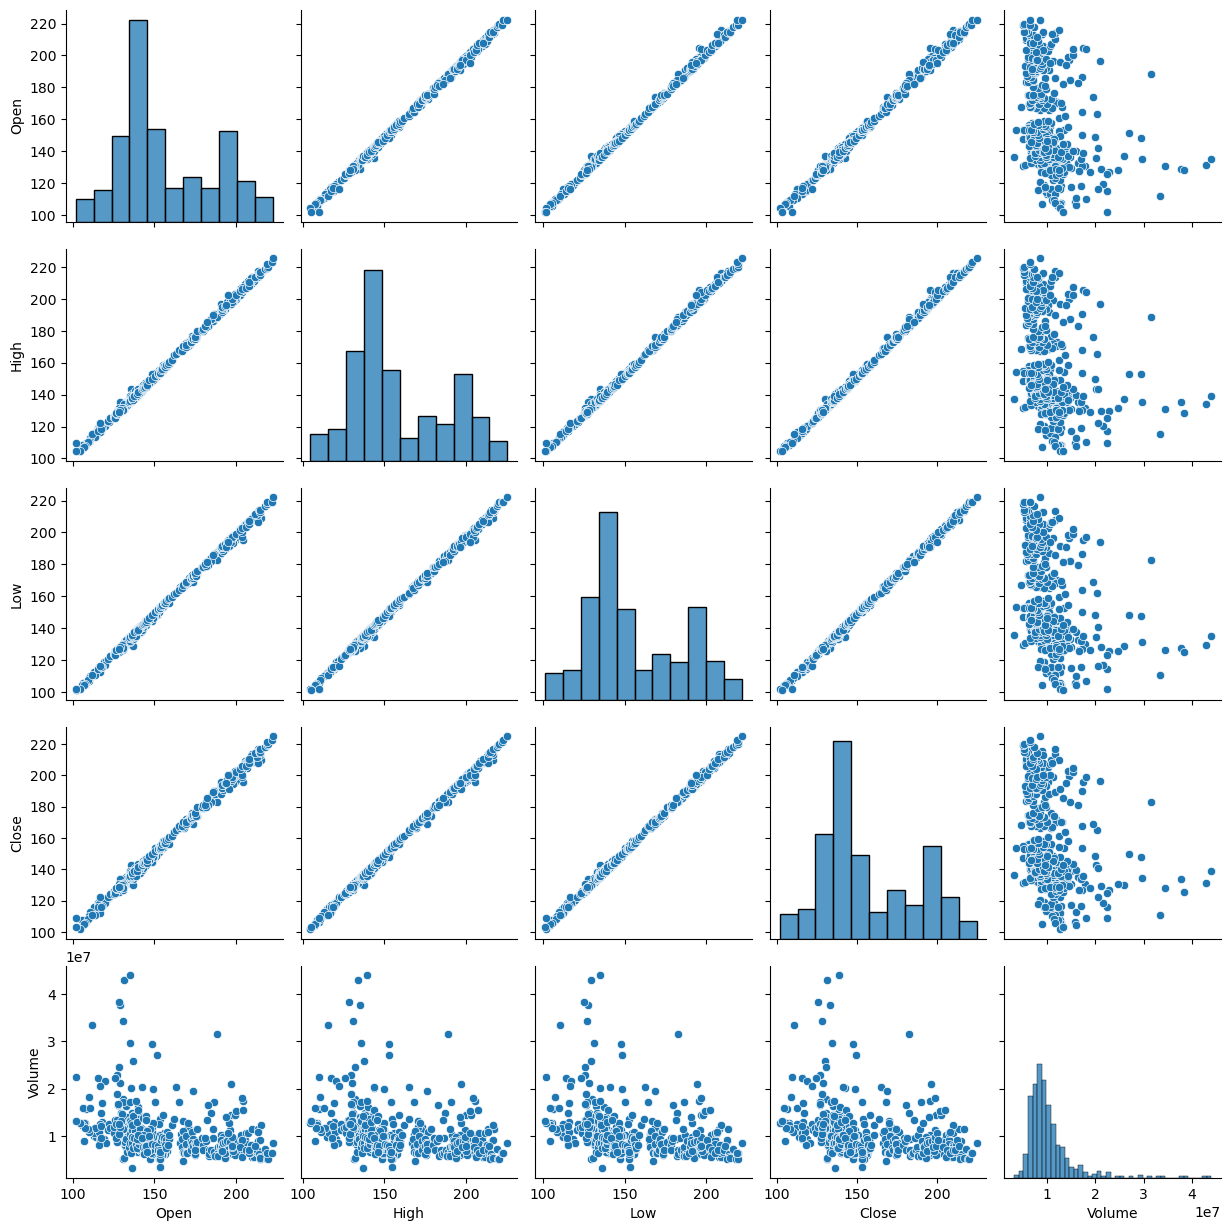

In [46]:
import seaborn as sns
sns.pairplot(df)

# Analysing the correlation factors

Text(0, 0.5, 'Close')

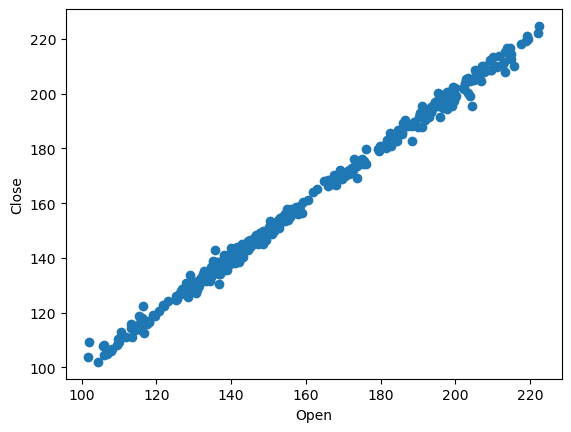

In [47]:
plt.scatter(df['Open'],df['Close'])
plt.xlabel("Open")
plt.ylabel("Close")

Text(0, 0.5, 'Close')

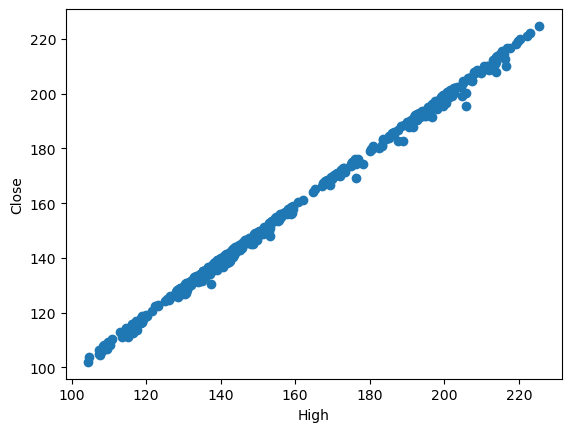

In [48]:
plt.scatter(df['High'],df['Close'])
plt.xlabel("High")
plt.ylabel("Close")

<Axes: xlabel='Low', ylabel='Close'>

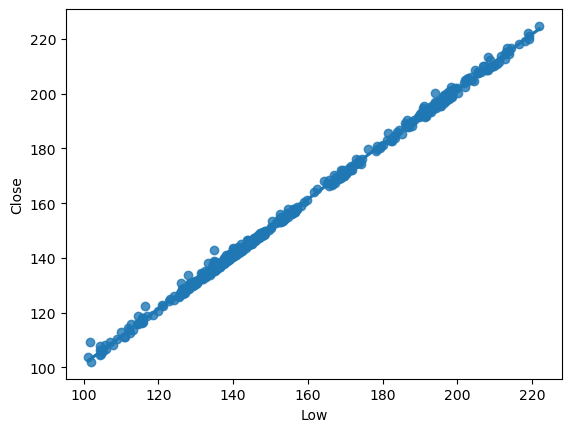

In [49]:
import seaborn as sns
sns.regplot(x="Low",y="Close",data=df)

Text(0, 0.5, 'Close')

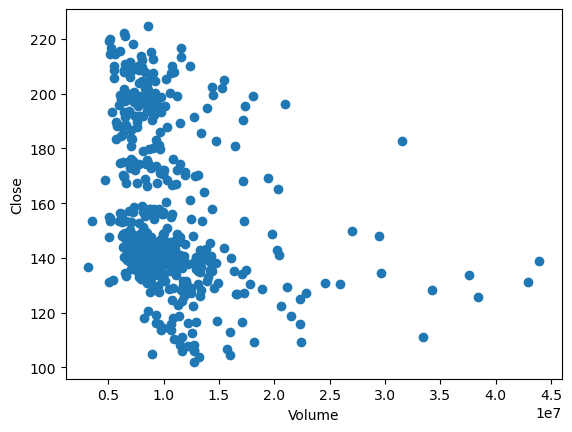

In [50]:
plt.scatter(df['Volume'],df['Close'])
plt.xlabel("Volume")
plt.ylabel("Close")

# Plotting the closing price

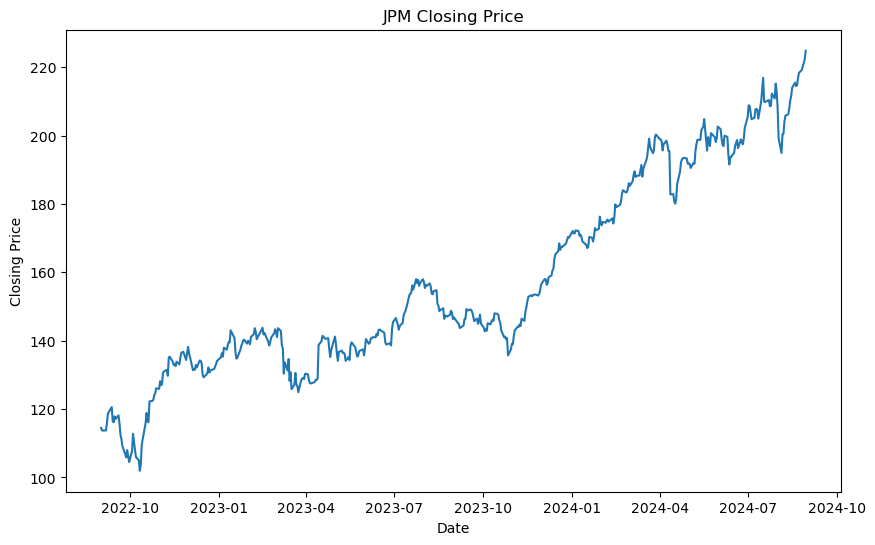

In [51]:
# Plot the closing price
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('JPM Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [75]:
from sklearn.preprocessing import MinMaxScaler

# Select all feature columns
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

# Check the scaled features
print(scaled_data.head())


       Open      High       Low     Close    Volume
0  0.095195  0.083430  0.088106  0.102165  0.166032
1  0.116570  0.106747  0.098715  0.095653  0.182902
2  0.103811  0.084422  0.089432  0.095897  0.160434
3  0.093869  0.095667  0.095151  0.113481  0.182443
4  0.111682  0.117827  0.110651  0.135461  0.201777


In [77]:
import numpy as np

# Create sequences for LSTM
def create_sequences(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])  # Use all features
        y.append(data[i + time_step, 3])   # Assuming 'Close' is at index 3
    return np.array(X), np.array(y)

# Set time step
time_step = 60  # You can change this to any value

# Create sequences
X, y = create_sequences(scaled_features, time_step)

# Reshape X for LSTM input
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])


In [78]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Building and training the LSTM model

In [79]:
!pip install scikeras

In [80]:
import sklearn
import scikeras

print("scikit-learn version:", sklearn.__version__)
print("scikeras version:", scikeras.__version__)


scikit-learn version: 1.5.1
scikeras version: 0.13.0


In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

def build_model(units=50, learning_rate=0.001):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))  # Input layer added here
    model.add(LSTM(units=units, return_sequences=True))
    model.add(LSTM(units=units, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Create the KerasRegressor
model = KerasRegressor(model=build_model, units=50, learning_rate=0.001, epochs=10, batch_size=16, verbose=0)

# Define the parameter grid
param_grid = {
    'units': [50, 100],
    'batch_size': [16, 32, 64],
    'epochs': [10, 20],
    'learning_rate': [0.001, 0.0001]
}

# Initialize GridSearchCV with the KerasRegressor model
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)

# Fit the grid search
grid_result = grid.fit(X_train, y_train)

# Print the best result
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=50; total time=  21.7s
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=50; total time=  21.4s
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=50; total time=  21.0s
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=100; total time=  24.2s
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=100; total time=  25.5s
[CV] END batch_size=16, epochs=10, learning_rate=0.001, units=100; total time=  23.9s
[CV] END batch_size=16, epochs=10, learning_rate=0.0001, units=50; total time=  21.0s
[CV] END batch_size=16, epochs=10, learning_rate=0.0001, units=50; total time=  21.0s
[CV] END batch_size=16, epochs=10, learning_rate=0.0001, units=50; total time=  21.2s
[CV] END batch_size=16, epochs=10, learning_rate=0.0001, units=100; total time=  26.6s
[CV] END batch_size=16, epochs=10, learning_rate=0.0001, units=100; total time= 5

In [116]:
# Rebuild the model with the best parameters
best_model = build_model(units=100, learning_rate=0.001)

# Train the model with the best batch size and number of epochs
best_model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - loss: 0.0696
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0075
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0025
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0023
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0017
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0010
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 9.8723e-04
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0010  
Epoch 9/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0010    
Epoch 10/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 8.9694e-04


In [117]:
# Evaluate the model
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0016 
Test Loss: 0.0018941734451800585


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step


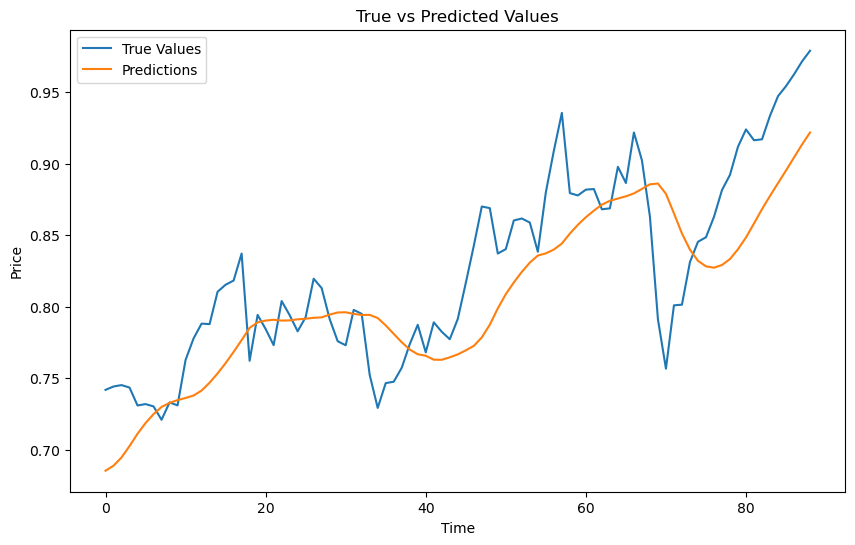

In [118]:
# Make predictions
predictions = best_model.predict(X_test)

# Reshape the predictions back to their original scale if needed
predictions = predictions.reshape(-1, 1)

# Compare predictions with actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label="True Values")
plt.plot(predictions, label="Predictions")
plt.title("True vs Predicted Values")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate performance metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")


Mean Absolute Error: 0.035067211079645805
Mean Squared Error: 0.001894173596223875
Root Mean Squared Error: 0.04352210468513529


# R^2 

In [120]:
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)
print(score)

0.5660474103791022


In [121]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.36385099595139314

# New Data Prediction

In [122]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

first_row = df.iloc[0].values.reshape(1, -1)  

print(first_row)

[[1.13290001e+02 1.14629997e+02 1.11910004e+02 1.14510002e+02
  9.97980000e+06]]


In [123]:
# Transform using the same scaler used for training, assuming scaler was fit on all features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)  # Fit and transform on all data features
scaled_first_row = scaler.transform(first_row)
print(scaled_first_row)

[[0.09519468 0.08342977 0.08810614 0.10216544 0.16603211]]


In [124]:
sequence = np.concatenate([scaled_data[-60:], scaled_first_row], axis=0)  # Extend with the new data
sequence = sequence[-60:]  # Ensure only the last 60 timesteps are used
sequence_reshaped = sequence.reshape((1, 60, 5))  # Reshape to (1, 60, 5)

print(sequence_reshaped)

[[[0.79229488 0.7969241  0.79345214 0.79770429 0.09196577]
  [0.80729084 0.7962626  0.80530466 0.79493649 0.07002319]
  [0.79627178 0.77228382 0.76518866 0.75219797 0.14774458]
  [0.78044738 0.76219616 0.74620807 0.72915986 0.23410987]
  [0.74995863 0.74450144 0.7426441  0.74649953 0.13183971]
  [0.74275059 0.74681663 0.7471198  0.74747637 0.08974277]
  [0.75956914 0.75277001 0.7572317  0.75724515 0.13521965]
  [0.76884843 0.77244923 0.76958152 0.77368933 0.14252975]
  [0.78367853 0.78476931 0.7859926  0.78728424 0.13535966]
  [0.7863298  0.76591699 0.77032745 0.76799089 0.43605137]
  [0.79544323 0.78295021 0.79419819 0.78899384 0.16126925]
  [0.79776301 0.7898959  0.79950278 0.78239991 0.09077198]
  [0.79246062 0.77228382 0.78740161 0.77718977 0.11147165]
  [0.79237781 0.78815945 0.7925404  0.79135457 0.11527654]
  [0.81367021 0.81081536 0.81243273 0.81650922 0.29690156]
  [0.83711678 0.84794112 0.84028189 0.84247798 0.17158346]
  [0.85741502 0.86257652 0.85777049 0.86999348 0.1125598

In [125]:
# Make predictions using the best model from GridSearchCV
prediction = best_model.predict(sequence_reshaped)

print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Prediction: [[0.8883212]]


# Pickling the model file for deployment

In [126]:
import pickle

In [127]:
pickle.dump(best_model,open('lstmmodel.pkl','wb'))

In [128]:
pickled_model=pickle.load(open('lstmmodel.pkl','rb'))

In [129]:
first_row = df.iloc[0].values.reshape(1, -1) 


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)  
scaled_first_row = scaler.transform(first_row)


sequence = np.concatenate([scaled_data[-60:], scaled_first_row], axis=0)  
sequence = sequence[-60:]  
sequence_reshaped = sequence.reshape((1, 60, 5)) 


prediction = pickled_model.predict(sequence_reshaped)

print(f"Prediction: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
Prediction: [[0.8883212]]
